In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(style="whitegrid", palette="muted")

%config InlineBackend.figure_format = 'svg'


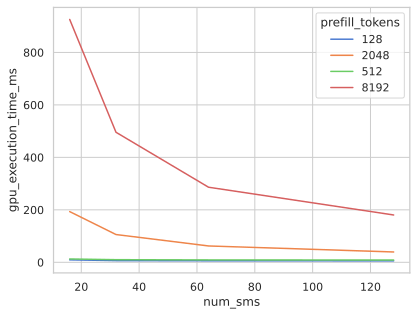

In [3]:
df = pd.read_csv("prefill-data.csv")
df["prefill_tokens"] = df["prefill_tokens"].astype(str)
df = df.groupby(["prefill_tokens",
                 "num_sms"])["gpu_execution_time_ms"].mean().reset_index()

sns.lineplot(x="num_sms",
             y="gpu_execution_time_ms",
             data=df,
             hue="prefill_tokens",
             errorbar="se")
# plt.yscale('log')

plt.show()


In [4]:
# make a new column named throughput = 1/gpu time
# then make a new column named utility = throughput / num_sms
df["throughput"] = 1 / df["gpu_execution_time_ms"]
df["utility"] = df["throughput"] / df["num_sms"]

# relative utility is for each prefill_tokens, normalize the utility by num_sms = 16
for prefill_tokens, group in df.groupby("prefill_tokens"):
    min_sm_utility = group.loc[group["num_sms"] == 16, "utility"]
    df.loc[group.index,
           "relative_utility"] = group["utility"] / min_sm_utility.item()


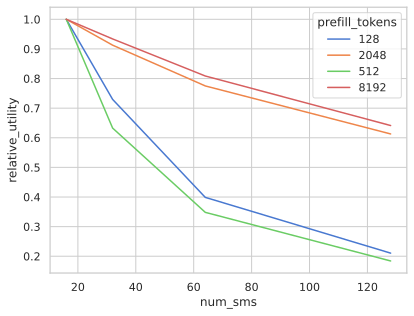

In [5]:
# plot the relative utility vs num_sms for each prefill_tokens
sns.lineplot(x="num_sms",
             y="relative_utility",
             data=df,
             hue="prefill_tokens",
             errorbar="se")
plt.show()